# Analysis of the public bike dataset in NYC
## by Seunggyun Han

## Investigation Overview

> This project aims to figure out spatial and temporal distribution of public bike ridings in NYC from June to August in 2020.

## Dataset Overview

> In this project, I will investigate [NYC CitiBike trip dataset](https://s3.amazonaws.com/tripdata/index.html) from June to August in 2020. This data set includes information about individual rides made in NYC.

In [1]:
# import all packages and set plots to be embedded inline
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pydeck

mapbox_key='pk.eyJ1Ijoic2doYW4iLCJhIjoiY2szamxqbjZnMGtmbTNjbXZzamh4cng3dSJ9.GGv4GVVoZ811d6PKi54PrA'

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_bike = pd.read_csv('data/citibike_master.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> Write a comment about your visualization here. The visualization should be in
the next cell, as a sub-slide type. Make sure your visualizations are polished!

## (Visualization 2)

>1. The trend of the changes in the number of ridings by each gender look similar.<br> 
2. The number of trips by subscribers per each day of the week slightly fluctuated, but not changed rapidly. However, the number of trips by customers was rapidly increased on Saturday. <br>


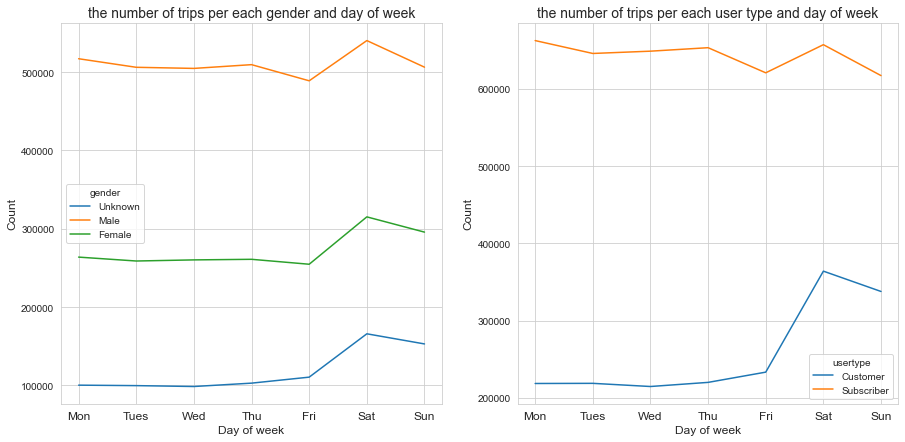

In [3]:
# calculate the numbers of trips per each gender and day of week
df_count_gender = df_bike.groupby(['dayofweek',
                                   'gender'],
                                    as_index=False).count()[['dayofweek',
                                                             'gender',
                                                             'tripduration']].rename(columns={'tripduration':'count'})

df_count_gender['gender'] = df_count_gender['gender'].replace(0,'Unknown').replace(1,'Male').replace(2,'Female')

df_count_user = df_bike.groupby(['usertype',
                                 'dayofweek'],
                                 as_index=False).count()[['usertype',
                                                          'dayofweek',
                                                          'tripduration']].rename(columns={'tripduration':'count'})
sns.set_style('whitegrid');
plt.subplots(1,2,figsize=(15,7))

plt.subplot(1,2,1)
plt.title('the number of trips per each gender and day of week', fontsize=14);
sns.lineplot(data=df_count_gender, x='dayofweek', y='count', hue='gender');
plt.xticks(ticks = [0,1,2,3,4,5,6], labels = ['Mon','Tues','Wed','Thu','Fri','Sat','Sun'],fontsize='12');
plt.xlabel('Day of week', fontsize=12);
plt.ylabel('Count', fontsize=12);

plt.subplot(1,2,2)
plt.title('the number of trips per each user type and day of week', fontsize=14);
sns.lineplot(data=df_count_user, x='dayofweek', y='count', hue='usertype');
plt.xticks(ticks = [0,1,2,3,4,5,6], labels = ['Mon','Tues','Wed','Thu','Fri','Sat','Sun'],fontsize='12');
plt.xlabel('Day of week', fontsize=12);
plt.ylabel('Count', fontsize=12);

## (Visualization 3)

>

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [8]:
!jupyter nbconvert slide_deck.ipynb --to slides --post serve --template output_toggle.tpl

[NbConvertApp] Converting notebook slide_deck.ipynb to slides
Traceback (most recent call last):
  File "c:\users\hsg82\appdata\local\continuum\anaconda3\envs\dand\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\users\hsg82\appdata\local\continuum\anaconda3\envs\dand\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\hsg82\AppData\Local\Continuum\anaconda3\envs\dand\Scripts\jupyter-nbconvert.EXE\__main__.py", line 7, in <module>
  File "c:\users\hsg82\appdata\local\continuum\anaconda3\envs\dand\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "c:\users\hsg82\appdata\local\continuum\anaconda3\envs\dand\lib\site-packages\traitlets\config\application.py", line 837, in launch_instance
    app.start()
  File "c:\users\hsg82\appdata\local\continuum\anaconda3\envs\dand\lib\site-packages\nbconvert\nbco